# Backtester

In [1]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
importlib.reload(m)


<module 'model' from '/Users/SunnyNie/Documents/Investing/metagame/model.py'>

In [2]:
df = m.get_backtesting_df(progress=True, sleep=0.1, save=True)

 |██████████████████████████████████████████████████| 100.0% 


In [3]:
pct = (df - df.shift(1))/df.shift(1)
# pct.drop("btc", inplace=True, axis=1)
pct.drop("busd", inplace=True, axis=1)
pct.dropna(how="all", inplace=True)
pct.tail(3)

,btc,1inch,aave,ada,agld,aion,akro,alcx,algo,alice,...,xtz,xvs,xzc,yfii,yfi,ygg,zec,zen,zil,zrx
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-02-02 16:00:00,-0.002487,0.003101,0.005100,0.003451,0.118951,0.005827,0.002493,-0.004707,-0.019007,0.001067,...,-0.001347,0.002493,NaN,0.000736,0.001509,-0.000472,0.016669,0.013941,-0.000184,0.001613
2022-02-02 17:00:00,0.003570,0.005502,0.004844,-0.001654,-0.064205,-0.000254,-0.006635,-0.004758,0.007362,-0.000718,...,0.016421,0.004079,NaN,0.017877,-0.001661,0.006789,0.007360,0.004370,0.004891,0.010100
2022-02-02 18:00:00,-0.001273,-0.000530,-0.003233,0.001274,-0.011704,0.001274,-0.003379,-0.000538,0.011104,-0.004415,...,0.028503,0.002543,NaN,-0.001738,-0.001475,-0.007251,-0.001685,0.003569,0.005262,0.007696


In [4]:
pct_ = pct.resample("2H").sum().replace(0, np.nan)

In [5]:
btc = pct_['btc']
pct_.drop("btc", inplace=True, axis=1)

In [6]:
pct_r = list(map(lambda x: pct_.iloc[x].sort_values(ascending=False).index, range(len(pct_))))

In [7]:
best = pct_r.copy()
best.insert(0, best[-1])
del best[-1]

In [8]:
best = list(map(lambda x: list(filter(lambda y: y not in ['gbp', 'eur'], x)), best))

In [54]:
def get_returns(pct, best, num=3):
    returns = [0, 0]
    pret = [0, 0]
    trades = ["", ""]
    total = len(pct)
    for i in range(2, total):
        prev_ret = pct.iloc[i-1][best[i][0]]
        # if best[i][0] not in mbi:
        #     returns.append(0)
        #     trades.append("")
        # elif prev_ret < -1.0:
        #     returns.append(0)
        #     trades.append("")
        # else:
        row = pct.iloc[i]
        # gain = sum(list(map(lambda x: row[best[i][x]], range(num))))/num
        gain = row[best[i][0]]
        if np.isnan(gain):
            gain = 0
            trades.append("")
        else: 
            trades.append(best[i][0])
        returns.append(-gain)
        pret.append(prev_ret)
        ui.printProgressBar(i, total)
    return returns, pret, trades


In [55]:
returns, pret, trades = get_returns(pct_, best, num=1)

In [56]:
list(map(lambda x: x[0], best[-8:]))

['agld', 'ant', 'rep', 'people', 'agld', 'idex', 'idex', 'ooki']

In [61]:
len(pct_)
d_ = pd.DataFrame({"trades":trades, 'pret':pret, 'target':returns}, index=pct_.index)

In [62]:
d_.to_csv("data/trades.csv")

In [12]:
d_ = pd.DataFrame({"r":returns, "pr":pret})

In [13]:
d_[d_.pr>0.05]

,r,pr
47,-0.008303,0.064568
50,-0.063860,0.057665
51,0.050626,0.063860
59,-0.025115,0.072402
217,0.023874,0.087075
...,...,...
19466,0.045200,0.071592
19467,0.012883,0.054744
19468,0.018002,0.097574
19469,-0.002062,0.103301


In [47]:
r = list(map(lambda x: x-0.004 if x != 0 else x, returns))
i = -1
b = [i-10000,i]

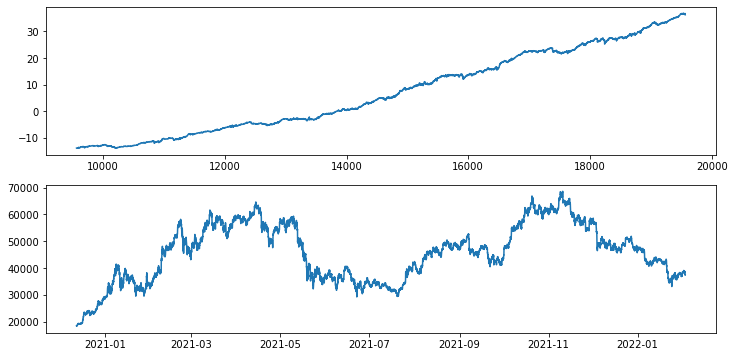

In [48]:
cumsum = pd.Series(r).cumsum()[b[0]:b[1]]
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(cumsum)
ax[1].plot(df.iloc[b[0]:b[1]].btc)

# cumsum.plot()

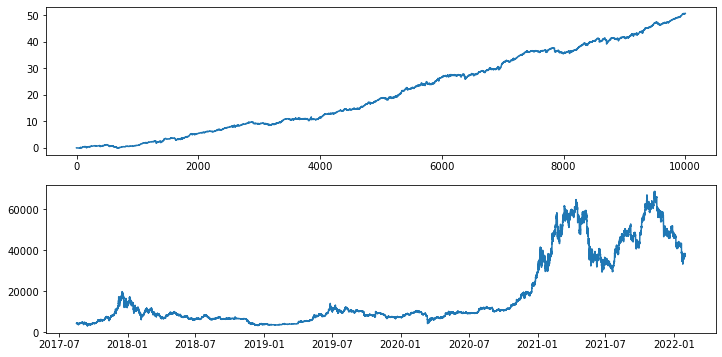

In [23]:
cumsum = pd.Series(r).cumsum()
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(cumsum)
ax[1].plot(df.btc)

# cumsum.plot()

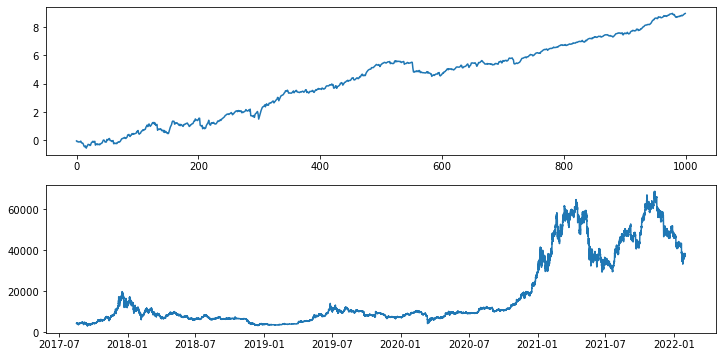

In [14]:
cumsum = pd.Series(r).cumsum()
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(cumsum)
ax[1].plot(df.btc)

# cumsum.plot()

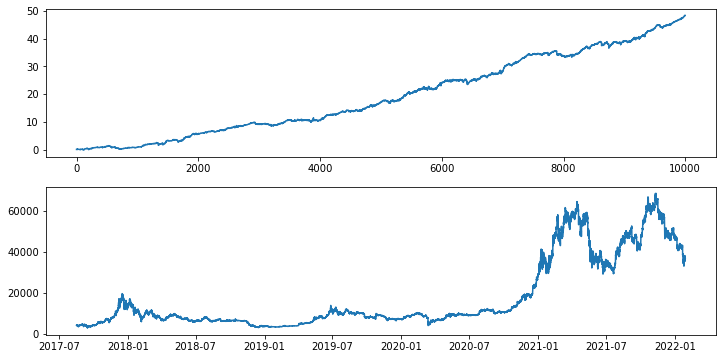

In [35]:
cumsum = pd.Series(r).cumsum()
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(cumsum)
ax[1].plot(df.btc)

# cumsum.plot()

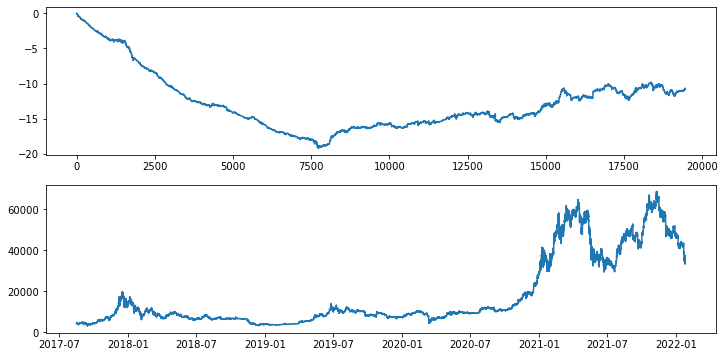

In [183]:
cumsum = pd.Series(r).cumsum()
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(cumsum)
ax[1].plot(df.btc)

# cumsum.plot()

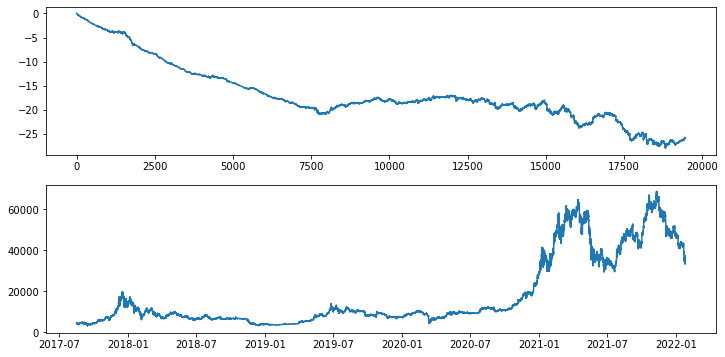

In [122]:
cumsum = pd.Series(r).cumsum()
fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0].plot(cumsum)
ax[1].plot(df.btc)

# cumsum.plot()

In [14]:
t = 1
r_ = list(map(lambda x: x+1, r[-12*1000:]))
for num in r_:
    t*=num


In [15]:
t

677.5877445623898

## Testing

In [12]:
from datetime import datetime, timedelta
client = bh.new_binance_client()

In [16]:
i = 0

In [17]:
i -= 1

In [18]:
s = pct_.iloc[i].name
e = s+timedelta(hours=2)
ss = (s-timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")
es = (e+timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")
name = best[i][0].upper()+"BTC"

In [19]:
print(f"{i}: Expected return for {name} on {ss}: {round(pct_.iloc[i][best[i][0]]*100, 2)}%")

-2: Expected return for DATABTC on 23 Jan 2022 14:00:00: -3.37%


In [20]:
klines = client.get_historical_klines(symbol=name, interval = "1m", start_str=ss, end_str=es)

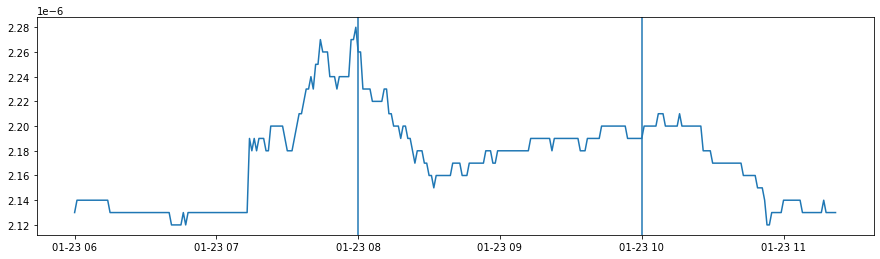

In [21]:
d = pd.DataFrame(list(map(lambda x: float(x[4]), klines)), 
                  index=list(map(lambda x: datetime.fromtimestamp(x[0] / 1e3), klines)), 
                  columns=['price'])
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(d.index, d.price)
ax.axvline(s-timedelta(hours=8))
ax.axvline(e-timedelta(hours=8))

### UTC hell

In [793]:
ss = (datetime.utcnow()-timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")
es = (datetime.utcnow()+timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")

In [794]:
klines = client.get_historical_klines(symbol=name, interval = "1m", start_str=ss, end_str=es)

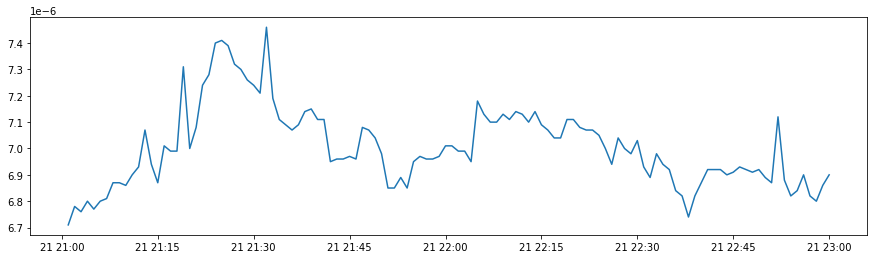

In [795]:
d = pd.DataFrame(list(map(lambda x: float(x[4]), klines)), 
                  index=list(map(lambda x: datetime.fromtimestamp(x[0] / 1e3), klines)), 
                  columns=['price'])
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(d.index, d.price)
# ax.axvline(s)
# ax.axvline(e)

## Forwardtesting

In [539]:
pct_r[-1]

Index(['req', 'mdt', 'jasmy', 'ong', 'forth', 'auction', 'wnxm', 'dusk',
       'front', 'ilv',
       ...
       'fis', 'nano', 'skl', 'srm', 'gala', 'nu', 'vgx', 'mkr', 'btt', 'npxs'],
      dtype='object', length=230)

In [550]:
pct_r[-2]

Index(['celr', 'rgt', 'rndr', 'wnxm', 'ong', 'firo', 'atom', 'vgx', 'klay',
       'ada',
       ...
       'near', 'perp', 'dusk', 'dydx', 'chr', 'auction', 'jasmy', 'icp', 'btt',
       'npxs'],
      dtype='object', length=230)

In [554]:
pct_.tail()

,1inch,aave,ada,agld,aion,akro,alcx,algo,alice,alpha,...,key,klay,mask,mft,npxs,nu,ray,shib,twt,vtho
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-21 20:00:00,-0.030973,-0.033229,-0.002109,-0.026499,-0.010390,-0.026142,-0.054583,-0.043896,-0.039669,-0.027491,...,-0.042721,0.004100,-0.043272,-0.012450,NaN,-0.002207,-0.013483,-0.053459,-0.022458,-0.051624
2022-01-21 22:00:00,0.055627,0.007091,-0.011940,-0.019799,0.006557,0.005810,-0.015917,-0.002485,-0.010796,0.000630,...,-0.007396,-0.004512,0.002828,-0.025476,NaN,-0.009293,0.021823,-0.009899,-0.000785,-0.007559
2022-01-22 00:00:00,-0.005339,0.017580,0.015851,0.001043,-0.003000,0.010683,0.031764,0.014104,0.010252,0.026991,...,0.008803,0.014765,0.012331,0.015930,NaN,0.015604,-0.002170,0.005259,0.009087,0.015018
2022-01-22 02:00:00,-0.012016,-0.026245,0.001260,-0.020043,-0.001287,-0.017320,-0.016035,-0.026651,-0.017408,-0.018469,...,-0.025801,0.001626,-0.012770,0.000680,NaN,-0.005348,-0.015044,-0.006433,-0.008497,-0.003718
2022-01-22 04:00:00,-0.002537,-0.001431,-0.001431,-0.006714,-0.003505,-0.002912,-0.008744,-0.002513,-0.002700,-0.004235,...,-0.008623,-0.000651,-0.010235,0.000092,NaN,-0.015634,-0.005738,-0.006841,-0.006774,-0.005545


In [80]:
btc = pd.read_csv("data/BTCUSDT.csv")

<AxesSubplot:>

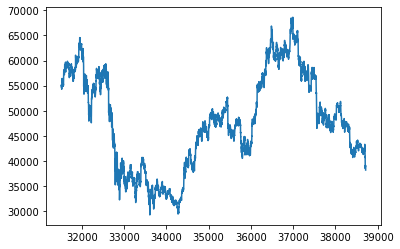

In [84]:
btc.iloc[-24*300:].close.plot()

In [73]:
best.iloc[-15:]

timestamp
2022-01-21 08:00:00     mdt
2022-01-21 09:00:00     dia
2022-01-21 10:00:00     mdt
2022-01-21 11:00:00    dydx
2022-01-21 12:00:00    kava
2022-01-21 13:00:00    dydx
2022-01-21 14:00:00    celr
2022-01-21 15:00:00    wnxm
2022-01-21 16:00:00    kava
2022-01-21 17:00:00    dydx
2022-01-21 18:00:00    rndr
2022-01-21 19:00:00    agld
2022-01-21 20:00:00     fun
2022-01-21 21:00:00     tvk
2022-01-21 22:00:00     clv
dtype: object

In [88]:
df.rndr

timestamp
2017-07-14 04:00:00         NaN
2017-07-14 05:00:00         NaN
2017-07-14 06:00:00         NaN
2017-07-14 07:00:00         NaN
2017-07-14 08:00:00         NaN
                         ...   
2022-01-21 15:00:00    0.000066
2022-01-21 16:00:00    0.000066
2022-01-21 17:00:00    0.000069
2022-01-21 18:00:00    0.000069
2022-01-21 19:00:00    0.000068
Name: rndr, Length: 41526, dtype: float64